# Importing Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Creating a path to the .pkl file

In [3]:
# Path to the project folder
path = r'C:\Users\mmoss\20-12-2021 Instacart Basket Analysis'

## Importing the .pkl file

In [4]:
# Importing the 4.8_ords_products_merged_derived_grouped
ords_prods_md = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8_ords_products_merged_derived_grouped.pkl'))

## Finding the name of the column

In [5]:
# Looking at the head()
ords_prods_md.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_last_order,frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,High Spender,20.5,Non-Frequent Customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367797,High Spender,20.5,Non-Frequent Customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367797,High Spender,20.5,Non-Frequent Customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Regularly busy,Fewest orders,10,New customer,6.367797,High Spender,20.5,Non-Frequent Customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Regularly busy,Fewest orders,10,New customer,6.367797,High Spender,20.5,Non-Frequent Customer


## Creating a bar chart

<AxesSubplot:>

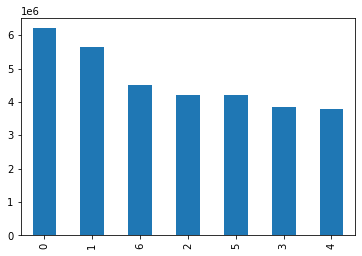

In [6]:
# Creating a bar chart
ords_prods_md['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

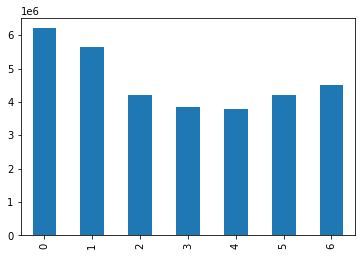

In [7]:
# Sorting by index order
ords_prods_md['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

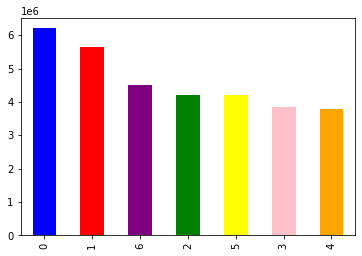

In [8]:
# Changing the color of the bars
ords_prods_md['orders_day_of_week'].value_counts().plot.bar(color =['blue','red','purple','green','yellow','pink','orange'])

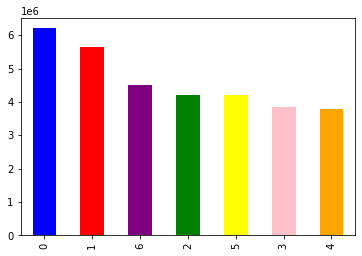

In [9]:
# Saving the chart to an object or variable
bar = ords_prods_md['orders_day_of_week'].value_counts().plot.bar(color =['blue','red','purple','green','yellow','pink','orange'])

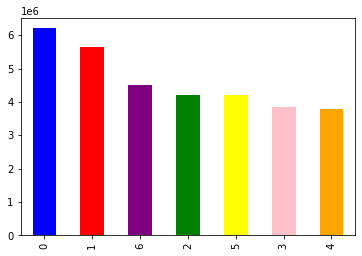

In [10]:
# Calling it
bar.figure

In [11]:
# Exporting the .png to the visualizations folder
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_down.png'))

## Creating a histogram of the prices column

<AxesSubplot:ylabel='Frequency'>

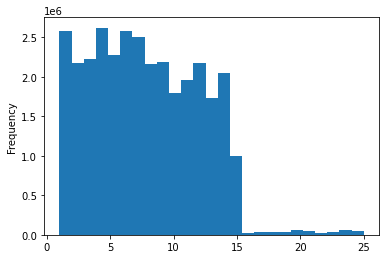

In [12]:
ords_prods_md['prices'].plot.hist(bins = 25)

## Creating a scatterplot of the prices column

<AxesSubplot:xlabel='prices', ylabel='prices'>

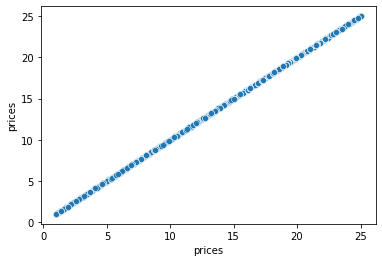

In [13]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_md)

I already removed the $99,000  and  $14,900 values in the data so I am getting a normal scatterplot of the prices. No need to clean the data any further.

## Checking for outliers

In [14]:
ords_prods_md.loc[ords_prods_md['prices']> 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_last_order,frequency_flag


No outliers

## Creating an object for the histogram

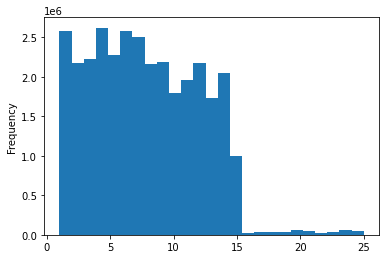

In [15]:
hist = ords_prods_md['prices'].plot.hist(bins = 25)

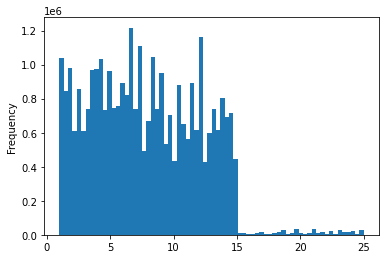

In [16]:
# Making the columns thinner
hist_2 = ords_prods_md['prices'].plot.hist(bins = 70)

In [17]:
# Exporting the .png to the visualizations folder
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_of_prices.png'))

## Creating Line Charts

In [18]:
# Creating a list holding true/false values to test np.random.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_md)) <= 0.7

In [19]:
# calling dev
dev

array([False,  True, False, ..., False,  True,  True])

In [20]:
# calling np.random.rand(10)
np.random.rand(10)

array([0.23055224, 0.64519968, 0.82012101, 0.90021919, 0.2001039 ,
       0.0323489 , 0.7061233 , 0.10883532, 0.00193764, 0.89102284])

In [21]:
# Store 70% of the sample in the dataframe big
big = ords_prods_md[dev]

In [22]:
# Store 30% of the sample in the dataframe small
small = ords_prods_md[~dev]

In [23]:
# Testing to see if I did it right
len(ords_prods_md)

32399732

In [24]:
len(big)+ len(small)

32399732

They are both the same!

In [25]:
# Reducing the columns to speed up processing
df_2 = small[['orders_day_of_week', 'prices']]

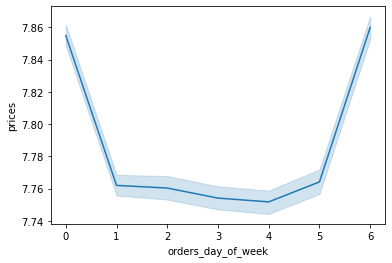

In [41]:
# Creating the chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [31]:
# Setting the dataframe similar to the entire dataset
df_3 = big[['orders_day_of_week', 'prices']]

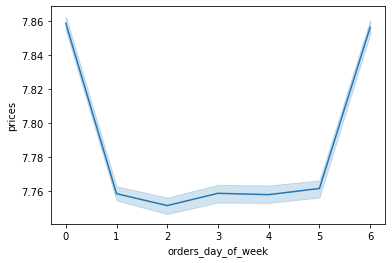

In [30]:
# Creating the chart
line_2 = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'prices')

They are both very similar! The small line chart is an accurate representation of the entire dataframe.